In [122]:
import pandas as pd
import numpy as np

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from sklearn.datasets import fetch_california_housing

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
data_object = fetch_california_housing()

In [127]:
# data_object

In [128]:
df_hpp = pd.DataFrame(data = data_object["data"], columns = data_object["feature_names"])
df_hpp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 1. Linear Relationship Between input and output

In [129]:
df_hpp["House_Price"] = data_object["target"]

In [130]:
df_hpp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [131]:
df_hpp.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
House_Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

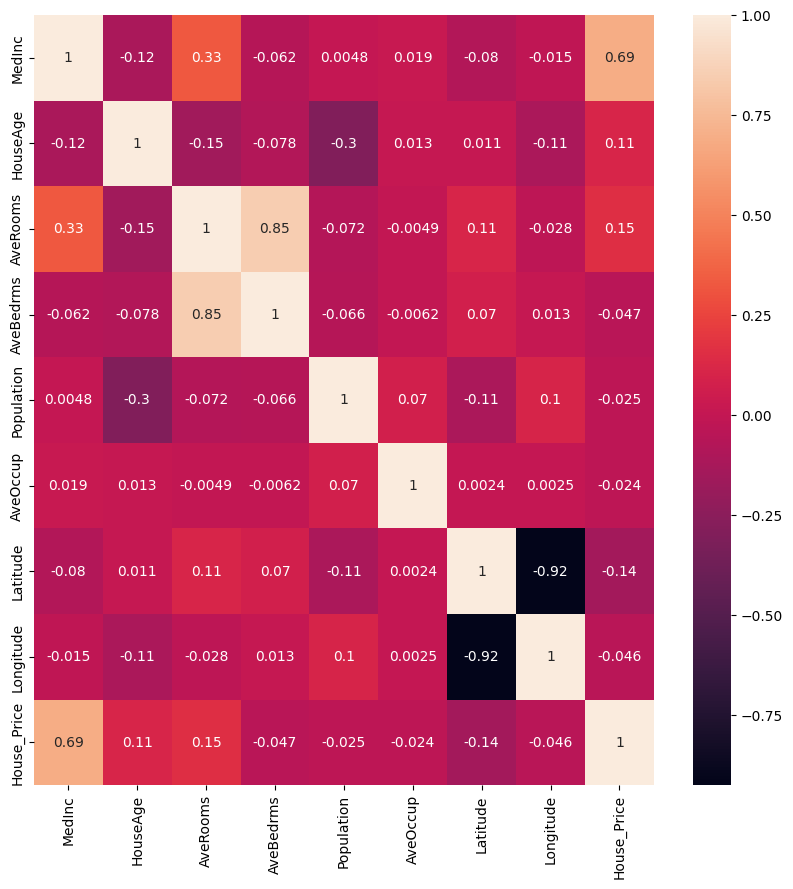

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(df_hpp.corr(),annot = True)

In [133]:
df_cs = pd.read_csv("Car_sales.csv")

In [134]:
df_cs

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [135]:
df_cs.dropna(inplace = True)

In [136]:
df_cs

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


In [137]:
# Select only the numeric columns
numeric_df = df_cs.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Sales_in_thousands  __year_resale_value  \
Sales_in_thousands             1.000000            -0.275426   
__year_resale_value           -0.275426             1.000000   
Price_in_thousands            -0.251705             0.954757   
Engine_size                    0.038111             0.527187   
Horsepower                    -0.152538             0.773110   
Wheelbase                      0.406839            -0.053685   
Width                          0.177802             0.178128   
Length                         0.272336             0.025390   
Curb_weight                    0.067184             0.363274   
Fuel_capacity                  0.138045             0.324796   
Fuel_efficiency               -0.066927            -0.398459   
Power_perf_factor             -0.175562             0.829511   

                     Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
Sales_in_thousands            -0.251705     0.038111   -0.152538   0.406839   
__year_re

In [138]:
#df_cs.corr()

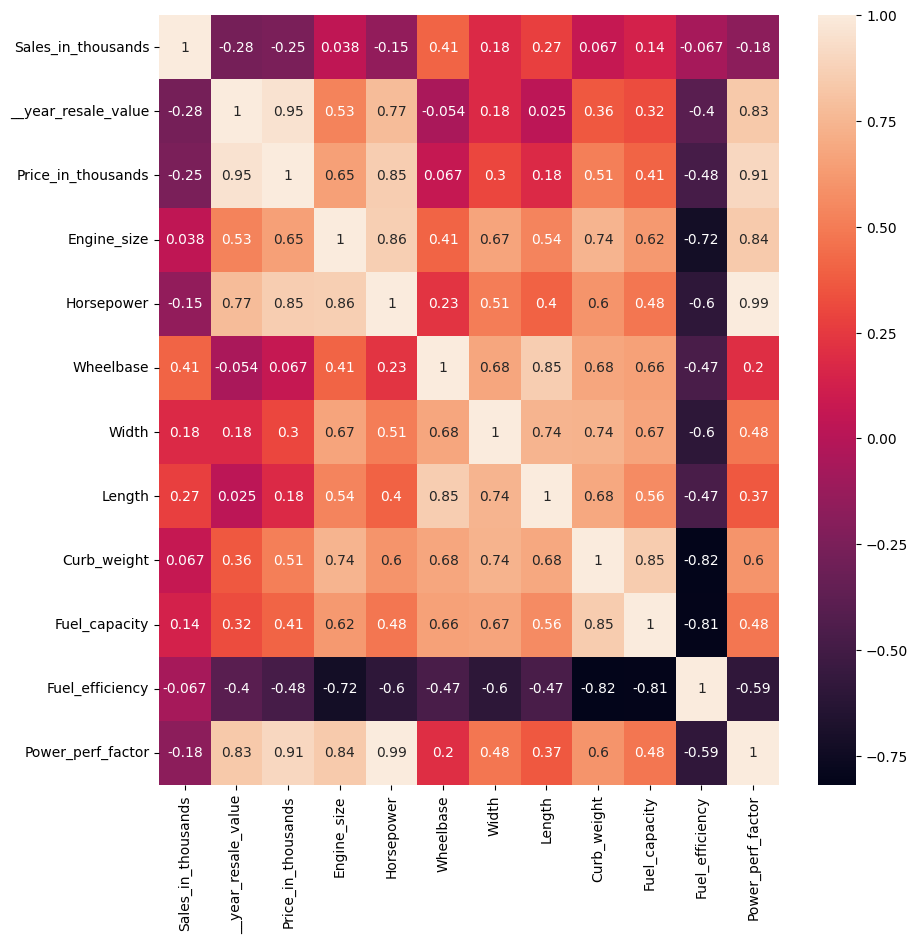

In [139]:
# Select only the numeric columns
numeric_df = df_cs.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [140]:
#plt.figure(figsize = (10,10))
#sns.heatmap(df_cs.corr(), annot = True)

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    float64


In [143]:
df_cs.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

### 2. Multicolinearity

In [144]:
considered_feature_01 = ['Sales_in_thousands','Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Power_perf_factor']

In [145]:
def compute_vif(features):
    x = df_cs[features]
    x["constant"] = 1
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif = vif[~(vif["Variable"]=="constant")]
    vif = vif.sort_values("VIF",ascending = False).reset_index(drop = True)
    return vif

In [146]:
compute_vif(considered_feature_01)

,Variable,VIF
0,Horsepower,136.364246
1,Power_perf_factor,122.349506
2,Curb_weight,7.985691
3,Engine_size,7.499099
4,Wheelbase,6.349051
5,Length,5.856483
6,Fuel_capacity,5.259172
7,Fuel_efficiency,4.514140
8,Width,3.337514
9,Sales_in_thousands,1.468496


In [147]:
considered_feature_02 = ['Sales_in_thousands','Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']

In [148]:
compute_vif(considered_feature_02)

,Variable,VIF
0,Engine_size,6.998891
1,Curb_weight,6.976093
2,Wheelbase,6.330002
3,Length,5.612253
4,Fuel_capacity,5.225456
5,Horsepower,4.711376
6,Fuel_efficiency,4.394782
7,Width,3.278253
8,Sales_in_thousands,1.468496


In [149]:
considered_feature_03 = ['Sales_in_thousands','Engine_size',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency']

In [150]:
compute_vif(considered_feature_03)

,Variable,VIF
0,Curb_weight,6.967115
1,Wheelbase,6.163433
2,Length,5.469611
3,Fuel_capacity,5.197050
4,Fuel_efficiency,4.392851
5,Width,3.242943
6,Engine_size,3.112357
7,Sales_in_thousands,1.363786


In [151]:
considered_feature_04 = ['Sales_in_thousands','Engine_size',
       'Wheelbase', 'Width', 'Length', 'Fuel_capacity',
       'Fuel_efficiency']

In [152]:
compute_vif(considered_feature_04)

,Variable,VIF
0,Wheelbase,6.000251
1,Length,5.315237
2,Fuel_capacity,4.474053
3,Fuel_efficiency,3.903309
4,Width,3.230701
5,Engine_size,2.872983
6,Sales_in_thousands,1.275850


In [153]:
considered_feature_05 = ['Sales_in_thousands','Engine_size',
        'Width', 'Length', 'Fuel_capacity',
       'Fuel_efficiency']

compute_vif(considered_feature_05)

,Variable,VIF
0,Fuel_efficiency,3.878502
1,Fuel_capacity,3.560395
2,Width,3.226260
3,Engine_size,2.672660
4,Length,2.410273
5,Sales_in_thousands,1.102628


In [154]:
df_cs.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [155]:
x = df_cs[['Sales_in_thousands','Engine_size',
        'Width', 'Length', 'Fuel_capacity',
       'Fuel_efficiency','Price_in_thousands']]

In [156]:
y = df_cs['__year_resale_value']

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [159]:
lr_model = LinearRegression()

In [160]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [161]:
y_pred = lr_model.predict(x_test)

In [162]:
y_pred

array([49.09838263,  9.47638457,  9.82480834, 20.53781379, 19.88590936,
       25.7300691 , 12.84260202, 14.98053733, 25.37158856, 57.6747904 ,
       10.43576936, 28.62587524, 29.38185736,  8.4336152 , 12.49074358,
       13.98428007, 11.09513955, 23.86020863, 11.75518585, 18.88470973,
       15.08646411, 51.29151413, 14.30686459, 16.2724511 ,  8.96020451,
       22.80685522,  7.2855252 , 25.07156311, 23.3864836 , 13.10645152])

### 3. Normal ditribution of residual 

In [163]:
Residual = y_test - y_pred

In [164]:
Residual

39     9.371617
57     0.373615
26    -4.664808
65    -0.847814
60    -2.360909
14    -3.205069
28    -0.482602
23    -1.955537
76    -4.846589
126    9.875210
58     2.774231
9      7.499125
3      0.343143
46    -1.008615
146    0.749256
122   -0.759280
31     1.544860
84    -4.735209
145   -0.330186
90     1.545290
59     2.623536
94    -0.916514
102   -3.011865
68    -2.497451
19     0.289795
52    -6.166855
129    1.914475
8      3.603437
111   -3.496484
139    2.338548
Name: __year_resale_value, dtype: float64

In [165]:
import seaborn as sns
import statsmodels.api as sm

<Axes: xlabel='__year_resale_value', ylabel='Density'>

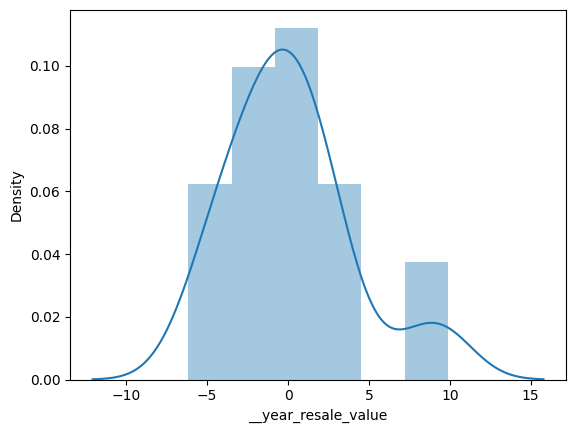

In [166]:
sns.distplot(Residual)

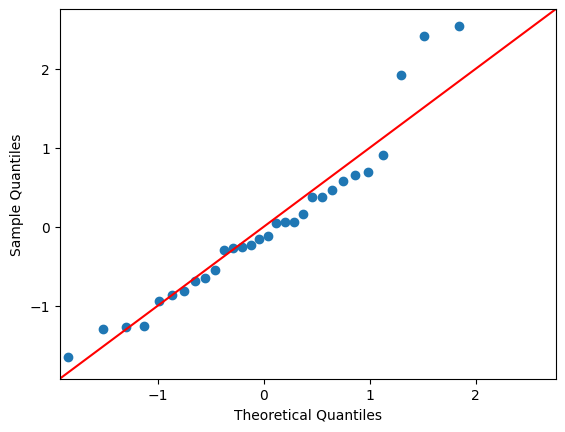

In [167]:
sm.qqplot(Residual,line = "45", fit = True)
plt.show()

In [168]:
# based on given figure this graph is not normal ditributed so the data is skweed

In [169]:
r2_score(y_test,y_pred) # The model accuracy is very good

0.9305103847184483

In [170]:
 # So the given data is not predicted well so we need to remove the outliers of the data

### 4. Homoscedasticity

In [171]:
# - Homoscedasticity means that the variance of errors (or residuals) in a regression model is constant across all levels of the independent variable(s).

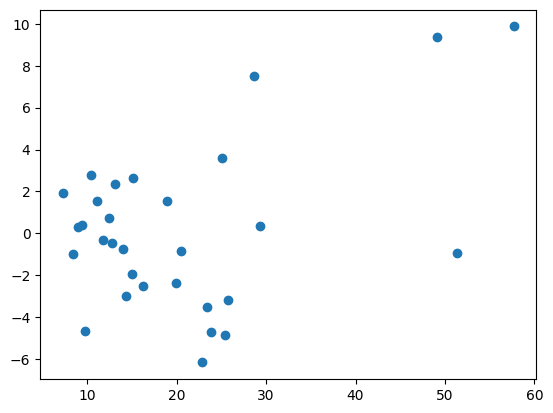

In [172]:
plt.scatter(y_pred,Residual)

## Checking the residual for House Price Prediction(hpp) 

In [173]:
df_hpp.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'House_Price'],
      dtype='object')

In [174]:
x = df_hpp.drop('House_Price',axis=1)
y = df_hpp['House_Price']

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [176]:
lr_model = LinearRegression()

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [178]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [179]:
y_pred = lr_model.predict(x_test)

In [180]:
y_pred

array([2.09604721, 1.55038945, 1.98420158, ..., 3.20203859, 1.67578997,
       0.75949215])

In [181]:
r2_score(y_test, y_pred) # We got the accuracy of data 58% 

0.5845001712785434

In [182]:
Residual = y_test - y_pred

<Axes: xlabel='House_Price', ylabel='Density'>

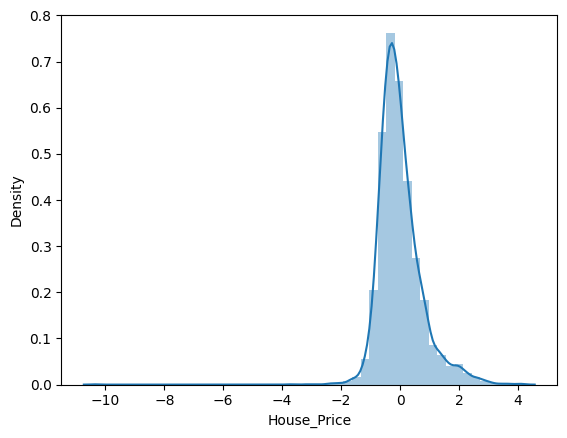

In [183]:
sns.distplot(Residual)

In [184]:
# The dataset contain the outliers 

### 4. Checking Homoscedasticity

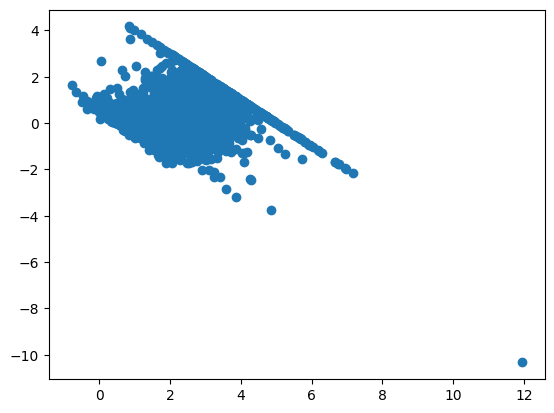

In [185]:
plt.scatter(y_pred,Residual)

In [188]:
import statsmodels.api as sm

x_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House_Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Mon, 01 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:00:59   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

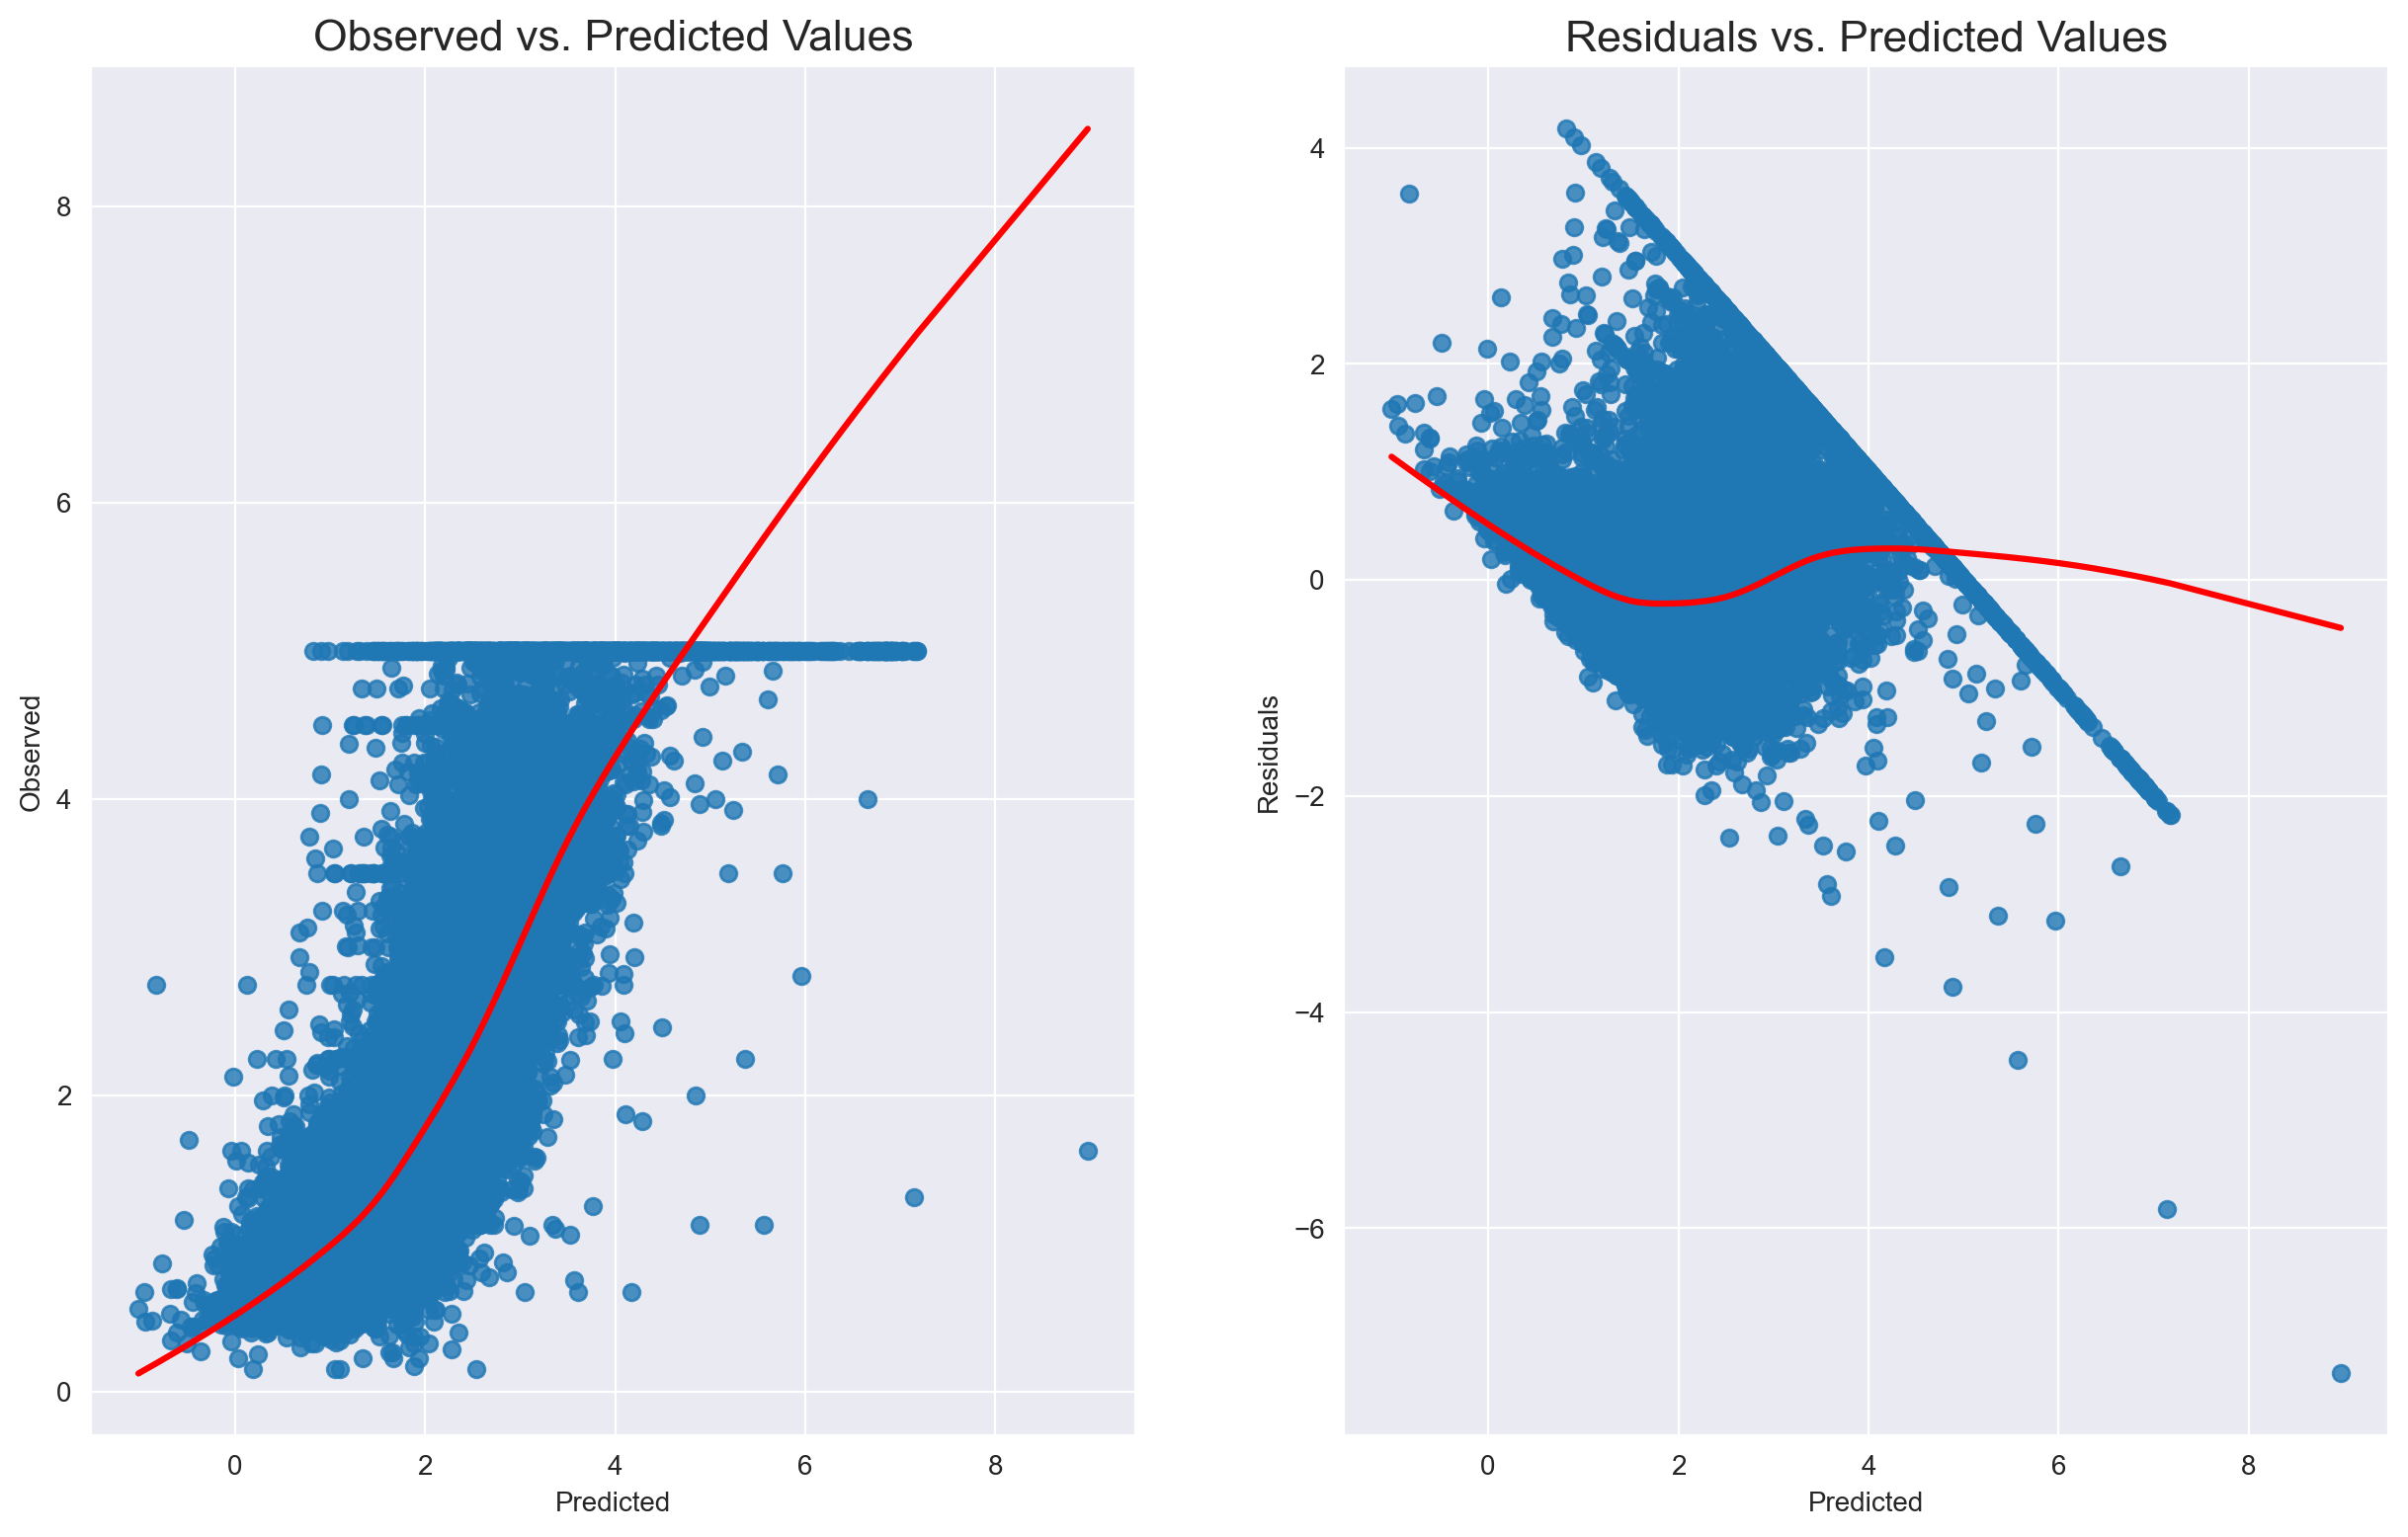

In [189]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)

### 5. No Autocorrelation of error

In [ ]:
# There should not be any specific pattern in the graph 

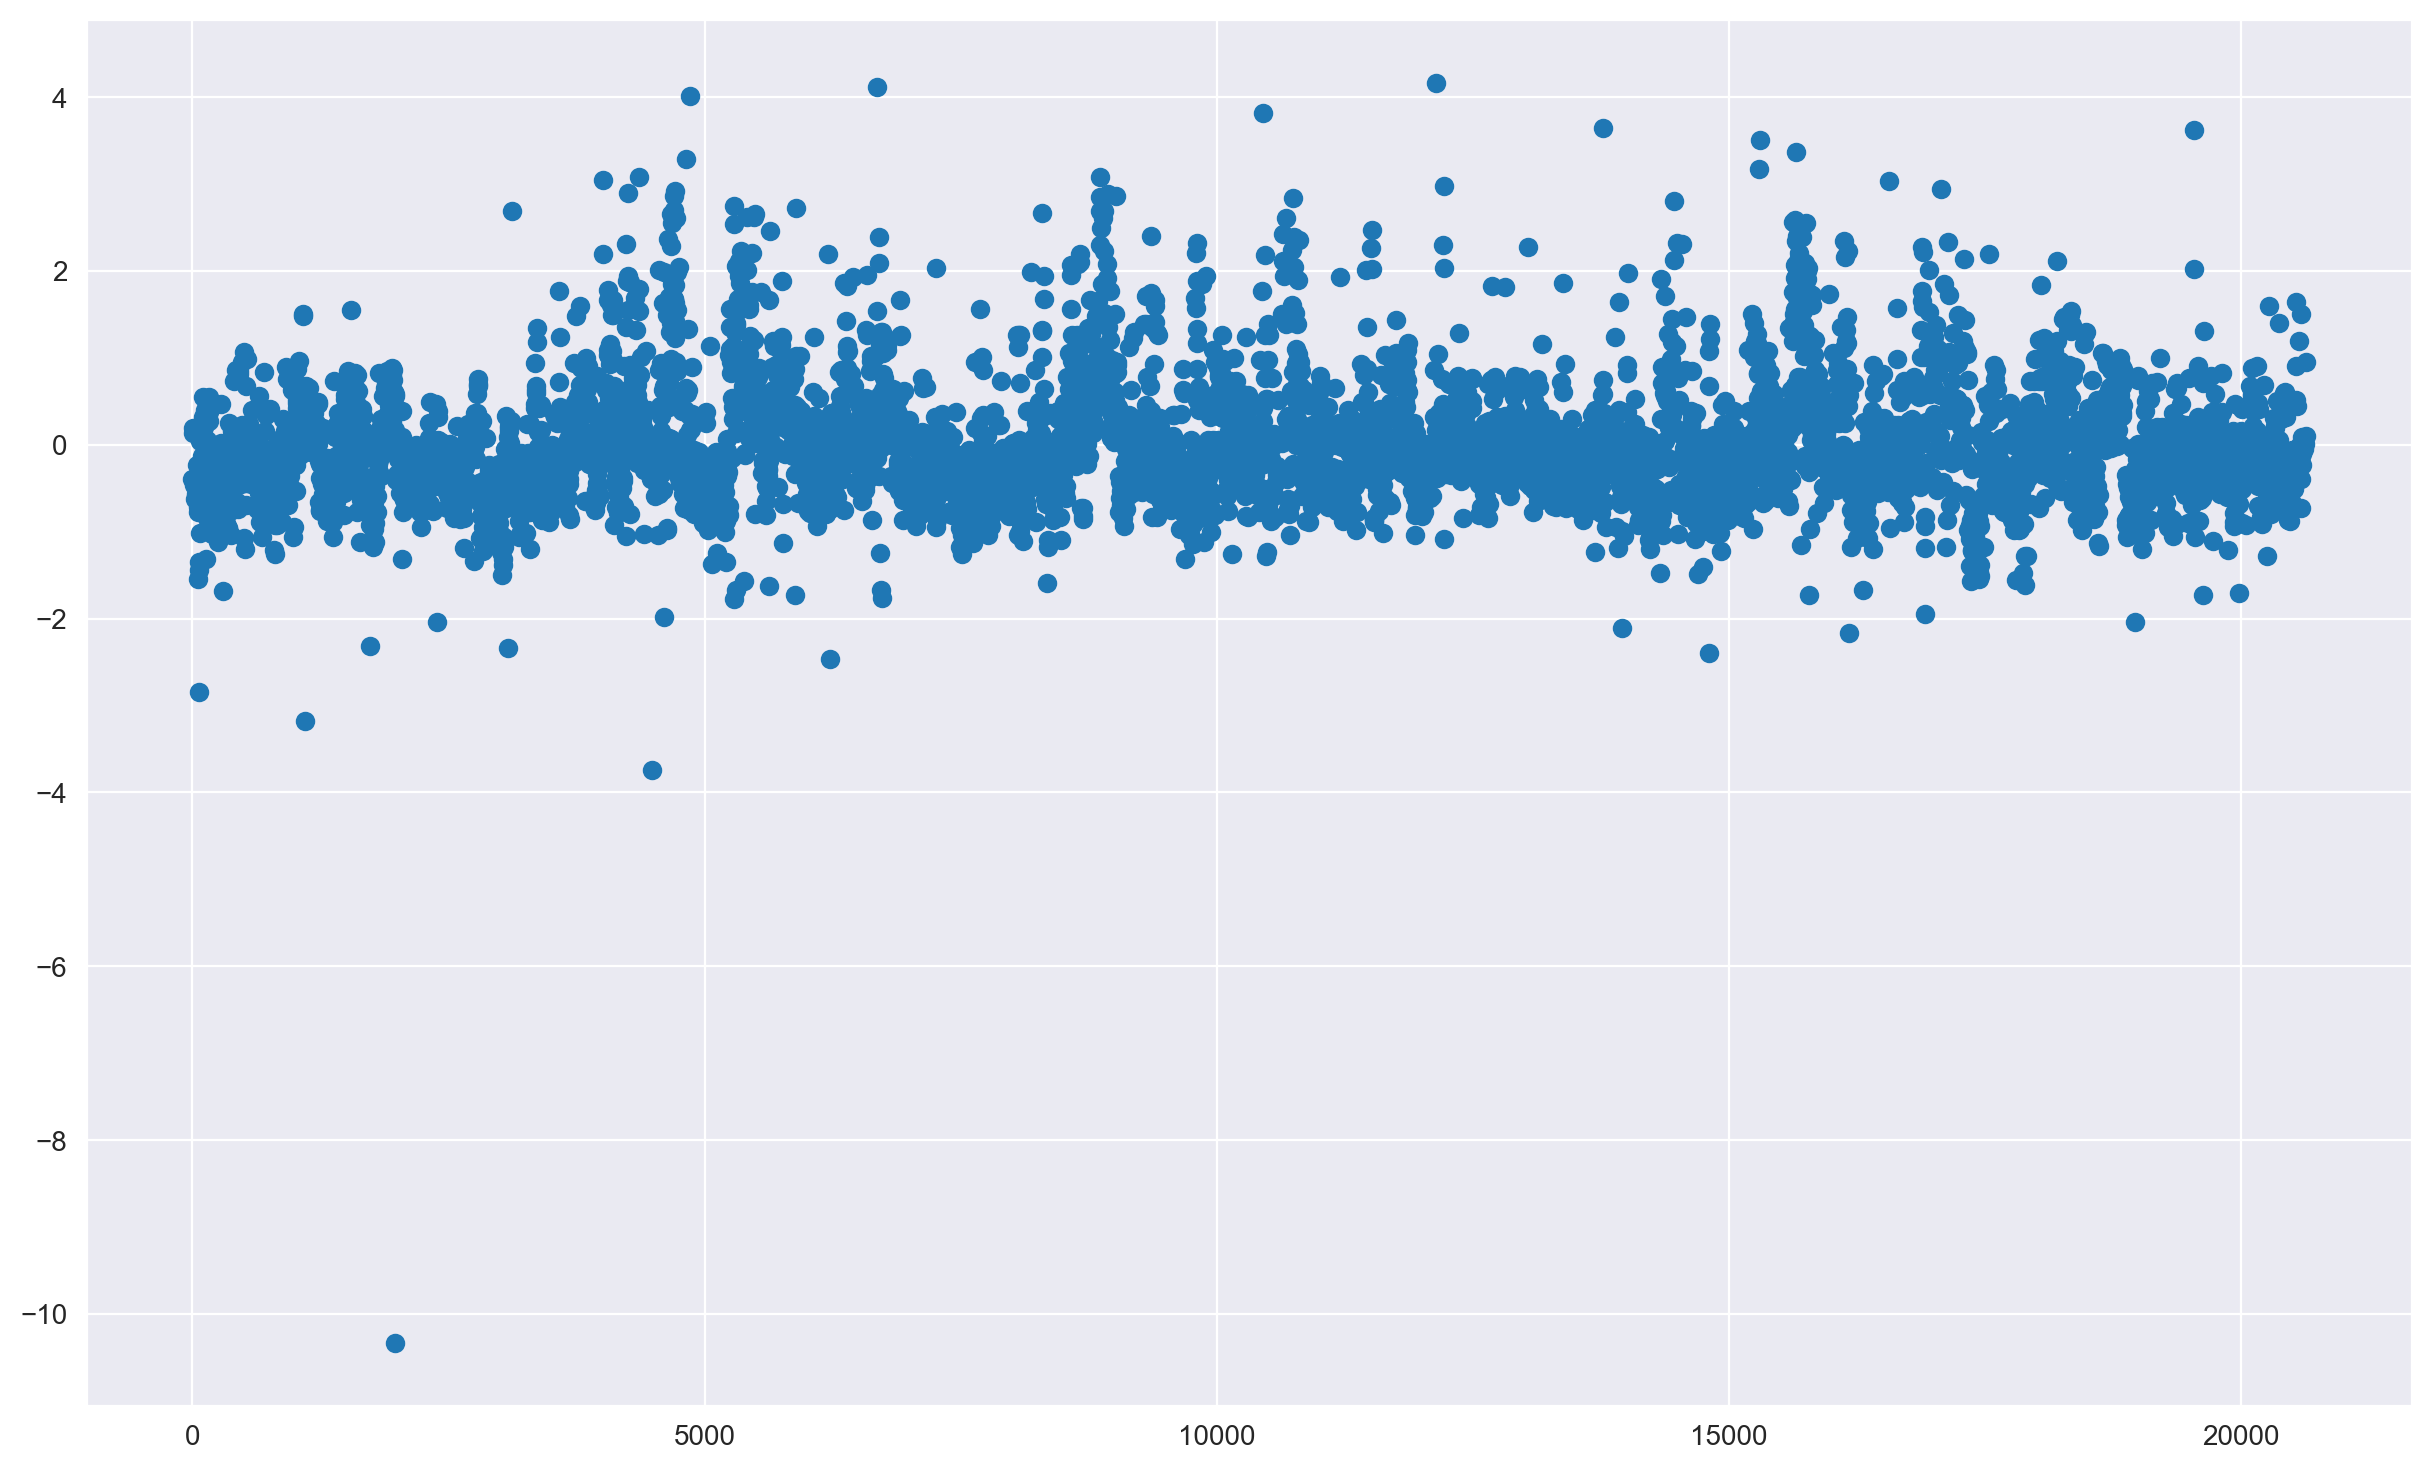

In [191]:
plt.scatter(Residual.index, Residual)